In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_theme()
sns.set_style("whitegrid")

In [2]:
df = pd.read_feather('bixi_usage_2023_cleaned.feather')
time_df = df[['start_timestamp','start_station_id']]

#removing unknown pickup stations
time_df = time_df[time_df['start_station_id'] != -1]

In [3]:
# Which months are busiers
monthly = time_df.resample('1ME', on='start_timestamp').count().reset_index()
monthly['month'] = monthly['start_timestamp'].dt.month_name()
monthly_stats = monthly.drop(['start_timestamp'], axis=1)
monthly_stats.columns = ['count', 'month']

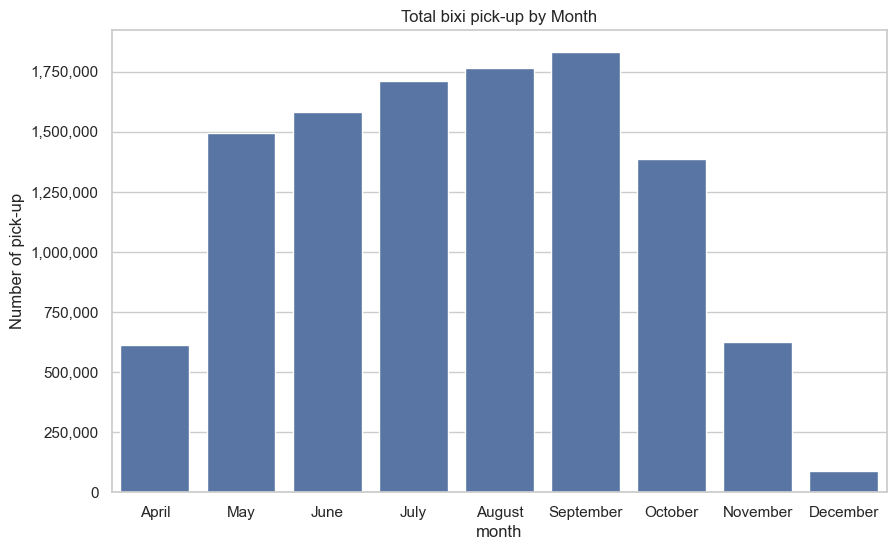

In [4]:
fig, ax = plt.subplots(figsize=[10,6])
sns.barplot(data=monthly_stats, y='count', x='month')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Total bixi pick-up by Month')
plt.xlabel('month')
plt.ylabel('Number of pick-up')
plt.show()

In [5]:
# Distribution by day of the week
dotw_df = df.copy()
dotw_df['dotw'] = dotw_df['start_timestamp'].dt.weekday
dotw_df['day_name'] = dotw_df['start_timestamp'].dt.day_name()
dotw = dotw_df[['dotw','day_name','start_station_id']].groupby(['dotw','day_name']).count()
dotw.columns = ['count']

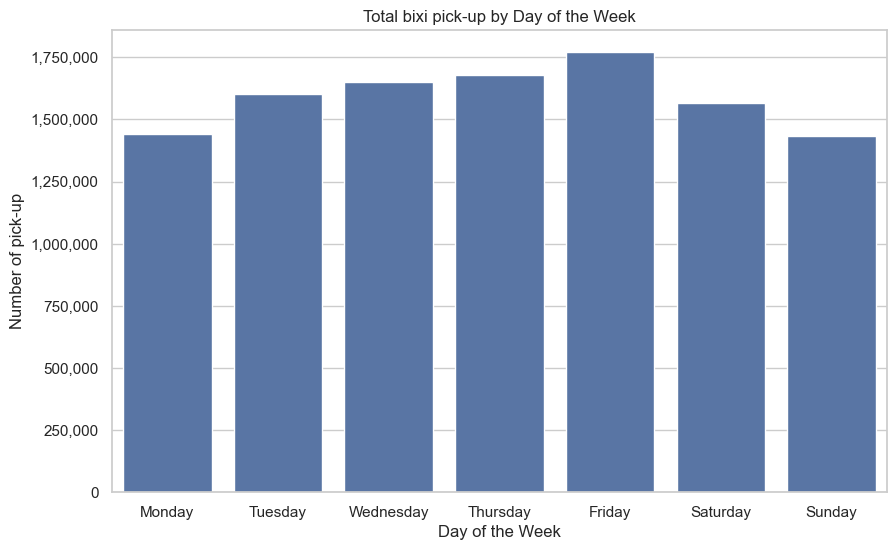

In [6]:
fig, ax = plt.subplots(figsize=[10,6])
sns.barplot(data=dotw, x='day_name', y='count')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Total bixi pick-up by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of pick-up')
plt.show()

In [7]:
hour_df = df.copy()
hour_df['dotw'] = hour_df['start_timestamp'].dt.hour
hourly = df[['hour','start_station_id']].groupby('hour').count()
hourly.columns = ['count']

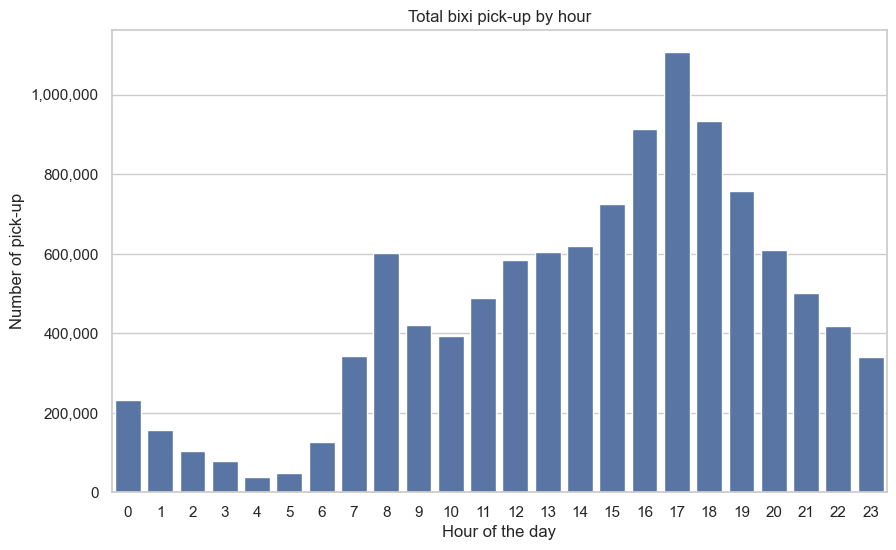

In [8]:
fig, ax = plt.subplots(figsize=[10,6])
sns.barplot(data=hourly, y='count', x='hour')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title('Total bixi pick-up by hour')
plt.xlabel('Hour of the day')
plt.ylabel('Number of pick-up')

plt.show()